<center><h1>The Universal workflow of machine learning</h1></center>
<center><h4>with IMDb Tensorflow dataset</h4></center>

## Table of contents -
* [1. Introduction](#Introduction)
* [2. Defining the problem and assembling a dataset](#Problem_definition)
   * [2.1 What will our input data be?](#input_data)
   * [2.2 What are we trying to predict?](#predict)
   * [2.3 What type of problem are you facing?](#problem)
   * [2.4 Hypothesis about Predictability](#predictability)
   * [2.5 Hypothesis about Data Informativeness](#informativeness)
* [3. Preparing your data](#preparing) 
   * [3.1 Feature Engineering - Vertorization, One-hot encoding,label encoding, Imputation](#Feature_Engineering)
* [4. Choosing a measure of success](#measure_of_success)
* [5. Baseline Model building](#Model_building)
   * [5.1. Model Architecture](#Architecture)
   * [5.2. Model Compilation](#Compilation)
   * [5.3. Validating your approach](#approach)
   * [5.4. Model Training](#Training)
   * [5.5. Data Visualization](#Visualization)
        * [5.5.1. Plotting the training and validation loss](#validation_loss)
        * [5.5.2. Plotting the training and validation accuracy](#validation_accuracy)
   * [5.6. Retraining a model from scratch](#Retraining)
   * [5.7. Model Predictions](#Predictions)
* [6. Deciding on an evaluation protocol](#evaluation_protocol) 
   * [6.1. Hold-out validation](#Hold-out)
   * [6.2. K-fold validation](#K-fold)
* [7. Fighting Overfitting ](#Fighting_Overfitting)
   * [7.1. Version of the model with lower capacity](#lower_capacity)
* [8. Scaling up: developing a model that overfits for baseline model](#Scaling_up_base)
* [9. Regularizing your model and tuning your hyperparameters](#tuning)
   * [9.1. Adding L2 weight regularization to the model](#L2) 
   * [9.2. Adding dropout](#dropout)
* [10. Extensive Experimentation](#Experimentation) 
   * [10.1. Experiment with one and three hidden layers](#1_3)
   * [10.2. Experiment with more or fewer hidden units - 32 units, 64 units etc](#32_64)
   * [10.3. Investigate replacing the binary_crossentropy loss function with mse](#mse)
   * [10.4. Experiment with replacing relu with tanh activations](#tanh)
   * [10.5. Investigate the effect of different learning rates. Optimal configuration](#lr)
   * [10.6. Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set](#best)
* [11. Developing a model that does better than a baseline](#Developing_model)
* [12. Scaling up: developing a model that overfits for the new model that does better than baseline](#Scaling_Developing)
* [13. Interpretation of results](#Results)
* [14. Wrapping up and Conclusion](#Conclusion)
* [15. References](#References)

### <U>1. Introduction</U> <a class="anchor" id="Introduction"></a>

For this project I will be following the the universal workflow of machine learning as demonstrated in Francois Chollet DLWP 4.5. Binary classification, which involves categorizing data into two classes, is a fundamental task in machine learning. In this project, we aim to classify movie reviews as either positive or negative based on their textual content. We will work with the IMDB dataset, which consists of 50,000 highly polarized reviews from the Internet Movie Database. The dataset is divided into 25,000 reviews for training and 25,000 for testing, with equal distribution between positive and negative reviews.

The Universal workflow of machine learning involves-
- Defining the problem and assembling a dataset
- Preparing your data
- Choosing a measure of success
- Building a baseline model
- Deciding on an evaluation protocol
- Fighting Overfitting
- Scaling up: developing the baseline model that overfits (not necessary only for more investigation)
- Regularizing your model and tuning your hyperparameters
- Developing a model that does better than a baseline
- Scaling up: developing a model that overfits for the new model that does better than baseline
- Interpretation of results
- Wrapping up and Conclusion

Additionally I will do -
- Extensive Experimentation before developing a model that does better than a baseline

### <U>2. Defining the problem and assembling a dataset</U> <a class="anchor" id="Problem_definition"></a>

We are conducting sentiment analysis on the IMDb dataset, aiming to predict the sentiment associated with movie reviews. The input data for our analysis consists of movie reviews obtained from the IMDb dataset, while the prediction target is the sentiment label assigned to each review.

#### 2.1 What will our input data be?<a class="anchor" id="input_data"></a>

The input data for the IMDb dataset consists of sequences of words representing movie reviews. These reviews have been preprocessed and converted into sequences of integers, where each integer corresponds to a specific word in a predefined dictionary.In other words, each movie review is represented as a sequence of integers, with each integer mapping to a particular word in the dictionary. This preprocessing step allows the machine learning model to work with numerical data, which is essential for training and making predictions.

When using the IMDb dataset in Keras, the input data will be in the form of these preprocessed sequences of integers. This format enables the model to learn patterns and relationships between words in the reviews and their associated sentiments (positive or negative). It's important to note that the IMDb dataset is split into separate training and test sets, each containing 25,000 reviews. This split ensures that the model is trained on one set of data and evaluated on a completely separate set, preventing overfitting and providing a reliable measure of its generalization performance.

#### 2.2 What are we trying to predict?<a class="anchor" id="predict"></a>

The prediction target is the sentiment associated with each review, which is binary: positive or negative. Each review is labeled as either 1 (positive sentiment) or 0 (negative sentiment).We utilize separate training and test sets, with 25,000 reviews each, to train and evaluate our machine learning model. Each set contains an equal distribution of positive and negative reviews, ensuring a balanced dataset for training and evaluation. This separation ensures that the model's performance is assessed on unseen data, preventing overfitting and providing a reliable measure of its generalization capabilities.

The availability of both movie reviews and sentiment annotations (positive or negative labels) within the IMDb dataset enables the training of machine learning models for sentiment analysis tasks. Researchers and practitioners can utilize this dataset to develop and evaluate sentiment analysis algorithms effectively.Therefore, within the IMDb dataset, there is indeed data availability, which is crucial for training, predicting and evaluating sentiment analysis models accurately.

The objective of our sentiment analysis task is to develop a machine learning model capable of accurately predicting the sentiment of movie reviews. By leveraging the available data, which includes both movie reviews and sentiment annotations, our goal is to train a model that can generalize well to unseen data and effectively classify the sentiment of new movie reviews.

#### 2.3 What type of problem are you facing?<a class="anchor" id="problem"></a>

The problem we are facing with the IMDb dataset is binary classification. In binary classification, the task involves categorizing input data into one of two classes or categories.

In the context of IMDb dataset for sentiment analysis, the input data consists of movie reviews and the prediction target is the sentiment associated with each review, which is binary: either positive or negative.
Therefore, the problem of classifying movie reviews as positive or negative sentiments falls under the category of binary classification. This understanding guides the choice of appropriate model architecture, loss function (e.g., binary cross-entropy), evaluation metrics, and other aspects of the machine learning pipeline tailored specifically for binary classification tasks.

#### 2.4 Hypothesis about Predictability -<a class="anchor" id="predictability"></a>
I hypothesize that the outputs (sentiment labels) can be predicted given the inputs (movie reviews). The training data, testing data and restriction to the top 10,000 most frequent words should be sufficient enough to get the right predictability. This assumption forms the basis of our task, we believe that there exists a relationship between the textual content of movie reviews and their associated sentiment labels, which our deep learning model can learn.

#### 2.5 Hypothesis about Data Informativeness -<a class="anchor" id="informativeness"></a>
We hypothesize that the available data (movie reviews with sentiment annotations and restriction to the top 10,000 most frequent words) is sufficiently informative to learn the relationship between inputs (reviews) and outputs (sentiments). This assumption implies that the dataset contains representative examples that capture the variability and complexity of real-world movie reviews, enabling the model to generalize well to unseen data.

<U>Dataset Selection -</U>

I chose the IMDb dataset beacuse i was interested in doing a sentiment analysis using binary classification.. it is also preferable due to its relevance, availability, size, simplicity, benchmarking status, and potential real-world applications.The dataset's binary classification task and established benchmarks facilitate model development and evaluation.

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from keras import models, layers
from tensorflow import keras
print(tf.__version__,'',tf.keras.__version__)

2.9.1  2.9.0


We import TensorFlow and Keras libraries and prints their versions. We also import specific modules and layers necessary to build a neural network model for sentiment analysis on the IMDb dataset.

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The IMDb dataset is divided into four variables: train_data, train_labels, test_data, and test_labels. The dataset is split into training and testing sets. The load_data() function loads the dataset, and the num_words parameter specifies the maximum number of words to include in the vocabulary. In this case, num_words=10000 will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size. 

This helps in reducing the dimensionality of the input data and speeds up training. Each review in the dataset is represented as a sequence of integers, where each integer represents a word in the review. The train_data and test_data variables contain lists of reviews, where each review is represented as a list of integers (word indices), and train_labels and test_labels contain the corresponding sentiment labels for the reviews in which: -

<b><u> 0 indicates a negative review and 1 indicates a positive review.</u></b>

In [4]:
print(train_data[100])

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]


The output is a sequence of word indices representing 101st review from the IMDb dataset.

Each number in the sequence corresponds to an index of a specific word in the IMDb dataset's vocabulary. For instance, the first number 1 might correspond to the word "the", 13 to "of", 244 to "and", and so forth. These indices are essentially pointers to words in the IMDb dataset's vocabulary, with each index uniquely mapping to a specific word.

This sequence of word indices serves as the input data for the neural network model. Each review is transformed into a sequence of these indices, where each index points to a particular word in the vocabulary. This preprocessing step enables the representation of textual data in a numerical format suitable for neural network processing.

In [5]:
max([max(sequence) for sequence in train_data])

9999

Restriction to the top 10,000 most frequent words, no word index will exceed 10,000

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

- It retrieves a dictionary (word_index) containing mappings of words to their corresponding indices in the IMDb dataset.

- It creates a reverse mapping (reverse_word_index) where indices are mapped back to words.

- It decodes the first review in the training data by iterating through each index in the review, looking up the corresponding word in the reverse_word_index dictionary, and joining them together to form the decoded review.

- Finally, it prints out the decoded review.

Overall, this code snippet allows us to understand the textual content of a review from the IMDb dataset by converting it from a sequence of word indices back into its original text form.

In [7]:
print(train_labels[100])

0


<b>The output 0 tells us that the sentiment of the 101st review is negative.</b>

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[104]])
print(decoded_review,'\n\n', 'label: ',train_labels[104])

? corbin bernsen gives a ? intense and riveting performance as dr alan feinstone a wealthy and successful beverly hills dentist who's obsessed with perfection when he discovers that his lovely blonde babe ? wife has been cheating on him and the irs start ? him about tax problems feinstone cracks under the pressure and goes violently around the bend director brian ? working from a suitably dark witty and demented script by stuart gordon dennis ? and charles ? exposes the ? ? and ? ? underneath the ? clean well ? surface of respectable ? rich america with deliciously ? glee moreover ? further ? up the grisly goings on with a ? twisted sense of pitch black ? humor bernsen positively shines as dr feinstone he expertly projects a truly unnerving underlying creepiness that's right beneath ? ? calm and assured ? the supporting cast are likewise excellent linda hoffman as ? bitchy ? wife brooke earl ? as smarmy ? irs agent marvin goldblum molly ? as ? assistant jessica patty toy as ? assistant

This code decodes the 105th review from the IMDb dataset and prints it alongside its corresponding label. It first decodes the review by mapping the sequence of word indices back to their respective words using a reverse dictionary. Then, it prints the decoded review followed by its label, which indicates whether the sentiment of the review is positive (1) or negative (0). 

<b>In this case the label is 1 which is a positive review.</b>

### <u>3. Preparing your data</u><a class="anchor" id="preparing"></a>

The network requires tensor inputs, not lists for that we can implement. This ensures compatibility with the neural network model.

There are two common approaches for this task:

Padding and Embedding Layer: One approach is to pad the sequences to ensure they all have the same length and then convert them into an integer tensor of shape (samples, word_indices). This can be done using an Embedding layer, which is capable of handling such integer tensors.

One-Hot Encoding: Another approach is to one-hot encode the sequences, which involves turning each sequence into a binary matrix where each word is represented by a vector of 0s and 1s. In this encoding scheme, each word corresponds to a specific index in the vector, and the vector is all 0s except for indices corresponding to the words in the sequence, which are set to 1.

I will be using the latter.

<u>One-hot encode</u> your lists to turn them into vectors of 0s and 1s.This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

This process is implemented in the vectorize_sequences function, which takes sequences of integers and converts them into binary matrices. After applying this function to the training and test data, the resulting matrices represent the vectorized training and test data, respectively.

Additionally, the labels are also vectorized, where positive and negative sentiments are encoded as 1s and 0s, respectively, and converted into floating-point value tensors.  

<u>So if the the output is closer to 1 then it is a good review if the output is closer to 0 it is a bad review.</u>

Once the data is vectorized, it is ready to be fed into a neural network for training.

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

vectorize_sequences converts sequences of word indices into binary feature vectors using one-hot encoding. The function takes a list of sequences representing reviews in the IMDb dataset and an optional parameter specifying the dimensionality of the feature vectors. It initializes a NumPy array with zeros, where each row corresponds to a sequence, and each column represents a word in the predefined vocabulary. It then iterates over each sequence, setting the elements in the array corresponding to the indices in the sequence to 1. Finally, it returns the array containing the binary feature vectors for all input sequences. 

#### 3.1 Feature Engineering - Vertorization, One-hot encoding, label encoding, Imputation/handling missing values <a class="anchor" id="Feature_Engineering"></a>

<u>Vectorization helps in-</u>

- Numerical Conversion: It converts sequences of word indices from the IMDb dataset into binary feature vectors, facilitating numerical processing by neural network models.

- Standardization: Ensures uniformity by converting each review into a fixed-length binary feature vector, which is crucial for consistent model training and evaluation.

- Efficient Representation: The resulting sparse binary feature vectors are computationally efficient, reducing memory usage and enabling faster processing of large datasets like IMDb.

- Alignment with Deep Learning Workflow: This preprocessing step aligns with the deep learning workflow, providing a standardized and efficient method for preparing textual data for input into neural network models.

<U>Train-test split</U>

We split the data into training and testing data

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

vectorize_sequences is applied to both the training and testing data of the IMDb dataset. The resulting binary feature vectors are stored in x_train and x_test, respectively. 

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

The output of x_train[0] shows that the first review has been converted into a binary feature vector where the second and third elements are set to 1, indicating the presence of corresponding words from the vocabulary in the review. All other elements are set to 0, indicating the absence of those words. This binary feature vector serves as the input data for the neural network model during training.

<U>Value normalization and label encoding -</U>

Value normalization and label encoding are essential preprocessing steps in machine learning. Value normalization ensures that features are on a consistent scale, preventing biases and promoting model stability and convergence during training. Label encoding converts categorical data into a numerical format, facilitating model understanding and compatibility with machine learning algorithms. These preprocessing techniques are crucial for optimizing model performance and ensuring effective training and prediction.

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now we convert the sentiment labels from the IMDb dataset into a numerical format suitable for training a neural network model. By utilizing NumPy arrays and setting the data type to 'float32', both the training and testing labels are transformed into a standardized numerical representation. This conversion ensures compatibility with deep learning frameworks, facilitating the subsequent training and evaluation processes. 

<u>Sorted set is the elements of training data 104 in ascending order with duplicates removed </u>

In [13]:
sorted_set = sorted(set(train_data[104]))
print([x for x in sorted_set if x < 11])
numbs = [i for i in range(11)]
print()
print(numbs)
print(x_train[104][:11])

[1, 2, 4, 5, 6, 7, 8]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.]


We analyze the content of the 105th review from the IMDb training dataset. We first extract the unique word indices from the review, sort them, and then print those indices that are less than 11. This shows a subset of words from the review with indices up to 10. We then generate a list of numbers from 0 to 10, representing the indices of words in the vocabulary. Finally, we print the first 11 elements of the binary feature vector corresponding to the review, indicating the presence or absence of words from the vocabulary up to index 10 in the review. 

Handling missing values -

we see that 3 and 9 are missing. The one-hot encoding has zeros in positions 3 and 9

### <u>4. Choosing a measure of success</u><a class="anchor" id="measure_of_success"></a>

Before moving on to the model building lets first choose a measure of success for our model.

For this dataset i chose accuracy.

Accuracy is a suitable metric for evaluating sentiment analysis models on the IMDb dataset due to several reasons. Firstly, the dataset contains an equal distribution of positive and negative sentiment reviews, making it balanced. Secondly, as a binary classification task, accuracy provides a clear measure of the proportion of correctly classified instances out of the total instances. Thirdly, accuracy is easy to interpret and communicate, allowing stakeholders to understand model performance intuitively. Additionally, accuracy offers a comprehensive view of model effectiveness across all classes and serves as a baseline for comparing different models. Therefore, accuracy is a logical choice for assessing sentiment analysis models on the IMDb dataset

### <u>5. Baseline Model building</u><a class="anchor" id="Model_building"></a>

#### 5.1. Model Architecture<a class="anchor" id="Architecture"></a>

The architecture, featuring a simple stack of dense layers with ReLU activation and a sigmoid output, is suitable for sentiment analysis on the IMDb dataset due to its simplicity, efficiency in representation learning, scalability, interpretability, and effectiveness in capturing non-linear relationships in text data.

In [14]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-06-17 10:29:53.479315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<u>Understanding the baseline model -</u>

The baseline model is built as a sequential stack of layers. It begins with an input layer consisting of 10,000 units, corresponding to the number of features in the input data. Two hidden layers follow, each containing 16 neurons with Rectified Linear Unit (ReLU) activation functions, enabling the model to learn complex patterns in the data. 

The final output layer comprises a single neuron with a sigmoid activation function, producing a probability score between 0 and 1 indicating the likelihood of a review being positive. This architecture facilitates binary classification, distinguishing between positive and negative sentiment in movie reviews.

#### 5.2. Model Compilation<a class="anchor" id="Compilation"></a>

In [15]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

The compiled neural network model is configured for training with specific optimization, loss calculation, and evaluation settings. The optimizer parameter is set to 'rmsprop', indicating the use of the RMSprop optimization algorithm during training, which dynamically adjusts learning rates for different model parameters. The loss parameter is assigned 'binary_crossentropy', a standard choice for binary classification tasks like sentiment analysis, to measure the discrepancy between predicted probabilities and true binary labels. Additionally, the accuracy metric is specified to assess the model's performance, measuring the proportion of correctly classified instances during training and validation. 

<u>Configuring the optimizer</u>

In [16]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


The model compilation step is refined by creating the RMSprop optimizer with a specified learning rate of 0.001 using optimizers.RMSprop(lr=0.001). By importing the optimizers module from Keras, a precise adjustment over optimizer parameters is achieved. The compiled neural network model retains its configuration for binary classification tasks with binary crossentropy as the loss function and accuracy as the evaluation metric. This modification allows for more precise adjustment of the optimizer's learning rate, enhancing the model's training dynamics and potential performance on sentiment analysis tasks.

<u>Using custom losses and metrics</u>

In [17]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])

The model compilation process remains consistent with the previous iterations, maintaining the use of the RMSprop optimizer with a specified learning rate. However, there is a shift in how the loss function and evaluation metrics are specified. Instead of using strings to denote the loss function and metrics, the code directly assigns objects from the losses and metrics modules imported from Keras. This approach provides greater clarity, precision, and flexibility in defining these components, enhancing code readability and allowing for more fine-grained customization if necessary.






#### 5.3. Validating your approach<a class="anchor" id="approach"></a>

Validating your approach in machine learning is important for ensuring the reliability and effectiveness of your models. It serves multiple important purposes, including assessing how well your model generalizes to unseen data, detecting and addressing overfitting issues to enhance model robustness, optimizing hyperparameters for improved performance, comparing different model architectures or techniques to identify the most suitable approach, and building confidence in the model's capabilities for real-world deployment. By validating your approach, you can make informed decisions, improve model quality, and achieve impactful results in various machine learning tasks.

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

Two subsets of the training data are created: x_val, containing the first 10,000 samples from x_train, and partial_x_train, containing the remaining samples. x_val serves as a validation set for evaluating the model's performance during training, while partial_x_train is used as the training set for the model. This separation allows for effective model evaluation and parameter tuning.

In [19]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

two subsets of the training labels are created: y_val, comprising the first 10,000 labels from y_train, and partial_y_train, consisting of the remaining labels. y_val is utilized as a validation set during training to assess the model's performance, while partial_y_train serves as the training label set. This division facilitates model evaluation and parameter adjustment for optimal performance.

#### 5.4. Model Training<a class="anchor" id="Training"></a>

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5245 - acc: 0.7817 - val_loss: 0.3964 - val_acc: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3060 - acc: 0.9001 - val_loss: 0.3055 - val_acc: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2242 - acc: 0.9272 - val_loss: 0.2827 - val_acc: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1786 - acc: 0.9422 - val_loss: 0.2786 - val_acc: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1452 - acc: 0.9543 - val_loss: 0.2803 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1207 - acc: 0.9620 - val_loss: 0.3022 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0992 - acc: 0.9711 - val_loss: 0.3103 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0799 - a

The compiled neural network model is trained using the fit method. The optimizer is set to 'rmsprop', the loss function to 'binary_crossentropy', and the evaluation metric to 'acc', indicating accuracy. The model is trained for 20 epochs with a batch size of 512 samples. The training data (partial_x_train and partial_y_train) are used for model training, while the validation data (x_val and y_val) are used to evaluate the model's performance after each epoch. The training progress and performance metrics are recorded in the history object for further analysis and visualization. This process allows for iterative model training and evaluation, aiming to optimize the model's performance on the task of sentiment analysis on the IMDb reviews.

Model training output results -

- The training accuracy (acc) steadily increases over epochs and reaches a very high value close to 1.0 (100%). This indicates that the model is able to learn from the training data very well and can classify the training samples with high accuracy.

- The training loss (loss) steadily decreases over epochs, which indicates that the model is minimizing its error on the training data as training progresses.

- The validation accuracy (val_acc) also increases initially but starts to slightly decrease towards the later epochs. This suggests that the model may be overfitting the training data, as it performs well on the training data but does not generalize as well to unseen validation data.

- The validation loss (val_loss) follows a similar trend as the validation accuracy, initially decreasing but then stabilizing or slightly increasing towards the end of training. This further supports the observation of potential overfitting.

- Overfitting occurs when a model learns to memorize the training data instead of generalizing from it. This often leads to high training accuracy but poor performance on unseen data. The discrepancy between training and validation performance is a common indicator of overfitting. The model's training accuracy reaches very high levels (close to 1.0), while the validation accuracy  slightly decreases. This suggests that the model is likely overfitting the training data.

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

The history_dict variable stores the training history of the neural network model, which includes metrics such as loss and accuracy recorded during the training process. By calling the .keys() method on the history_dict, we obtain a list of keys representing the available metrics tracked during training. These keys typically include 'loss', 'accuracy', 'val_loss', and 'val_accuracy', corresponding to the training and validation metrics recorded during each epoch. 

In [48]:
history_dict['loss']

[0.5224974155426025,
 0.3121812641620636,
 0.22672544419765472,
 0.17763064801692963,
 0.14408229291439056,
 0.11608482897281647,
 0.09605712443590164,
 0.07958149909973145,
 0.06418953090906143,
 0.05583503469824791,
 0.04098912701010704,
 0.03526778146624565,
 0.02817384898662567,
 0.022429652512073517,
 0.017448944970965385,
 0.014543234370648861,
 0.009498635306954384,
 0.007188604678958654,
 0.008315914310514927,
 0.003287909086793661]

 Retrieves the recorded values of the training loss metric from the training history of the neural network model. 

#### 5.5. Data Visualization <a class="anchor" id="Visualization"></a>

#### 5.5.1. Plotting the training and validation loss<a class="anchor" id="validation_loss"></a>

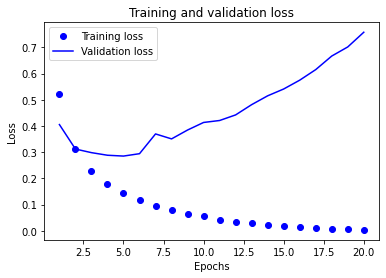

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history.history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We now effectively train the neural network model to classify movie reviews as positive or negative based on their text content. The systematic investigation begins with the compilation of the model, where the optimizer, loss function, and evaluation metrics are carefully selected. Subsequently, the model is trained over 20 epochs, with training and validation loss values recorded for analysis. Utilizing Matplotlib, the code generates a plot showcasing the training and validation loss trends over epochs. This visualization allows for the assessment of the model's learning dynamics, revealing insights into potential overfitting or underfitting.

#### 5.5.2. Plotting the training and validation accuracy<a class="anchor" id="validation_accuracy"></a>

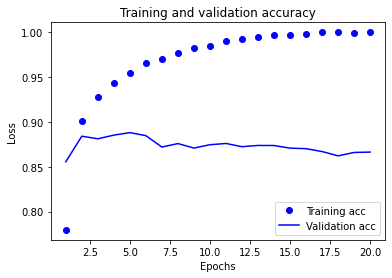

In [50]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The second plot starts by clearing the current figure (plt.clf()) to ensure a fresh plot. The accuracy values for both training and validation sets are extracted from the training history and stored in acc_values and val_acc_values variables, respectively. These values are then plotted against the number of epochs using plt.plot(), with blue dots representing training accuracy and a solid blue line representing validation accuracy.

<u>Observations of plots -</u>

The training loss decreases with every epoch, and the training accuracy increases with every epoch. It is what we would expect when running gradient descent optimization, the quantity we are trying to minimize should be less with every iteration. But that is not the case for the validation loss and accuracy, they seem to peak at the fourth epoch. A model that performs better on the training data is not necessarily a model that will do better on data it has never seen before. This means the model is <b><U>overfitting</U></b>, after the second epoch, we are overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.<b><U>We will fight this overfitting later in the code using some techniques.</U></b>

#### 5.6. Retraining a model from scratch<a class="anchor" id="Retraining"></a>

In [53]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4773 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2740 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.9267
Epoch 4/4
782/782 [==============================] - 1s 914us/step - loss: 0.2942 - accuracy: 0.8837


[0.29419681429862976, 0.883679986000061]

A new neural network model is constructed and trained from scratch. The model architecture consists of a sequential stack of layers, starting with an input layer of 10,000 units corresponding to the feature dimensions of the IMDb dataset. Two hidden layers with 16 units each and ReLU activation functions are added, followed by a single output neuron with a sigmoid activation function for binary classification. The model is compiled with the RMSprop optimizer, binary crossentropy loss function, and accuracy metric.

Subsequently, the model is trained using the fit() method on the training data (x_train and y_train) for 4 epochs with a batch size of 512. This process involves iteratively updating the model parameters to minimize the loss and improve accuracy.

After training, the model's performance is evaluated on the test data (x_test and y_test) using the evaluate() method. The evaluation results, including the loss value and accuracy metric, are stored in the results variable for further analysis or reporting. This comprehensive workflow demonstrates the process of training and evaluating a neural network model for sentiment analysis on the IMDb dataset, adhering to best practices in deep learning.

Retraining model results -

- The training accuracy steadily increases over epochs, indicating that the model is learning to classify the training data with increasing accuracy.

- The training loss steadily decreases over epochs, suggesting that the model is effectively minimizing its error on the training data.

- The test accuracy is approximately 88.37%, indicating that the model achieves an accuracy of around 88.37% on unseen test data.

- The test loss is approximately 0.2942, which represents the average loss over all test samples. Lower values of loss indicate better performance.

- The fact that the test accuracy is close to the training accuracy suggests that the model generalizes well to unseen data. This indicates that the model has not significantly overfit the training data.

- The test loss is also reasonably low, indicating that the model's predictions are relatively confident and accurate on the test set.

<U>Understanding why retraining a model from scratch is needed -</U>

- Retraining a model from scratch may be necessary for several reasons. Over time, the distribution of data may change and the original model may become outdated or less effective at capturing patterns in the new data. Retraining allows the model to adapt to these changes and maintain its performance.

- It provides an opportunity to incorporate any new labeled data that may have become available since the initial training. By leveraging this additional data, the model can potentially improve its predictive power and generalization capabilities. 

- It allows for the exploration of different model architectures, hyperparameters, and optimization techniques. This iterative process enables the discovery of more effective models that better suit the problem at hand. 

- It can help address issues such as model degradation or overfitting that may have arisen during previous training iterations. By starting fresh, it's possible to implement corrective measures and optimize the model's performance.

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________



The model.summary() method displays a succinct overview of the neural network model's architecture and parameters. The model, designated as "sequential_3," comprises three dense layers: two hidden layers with 16 units each and a single output layer with one neuron for binary classification. The output shapes of the layers are presented along with the number of trainable parameters. In total, the model contains 160,305 trainable parameters, encompassing weights and biases. 

#### 5.7. Model Predictions<a class="anchor" id="Predictions"></a>

<U>Using a trained network to generate predictions on new data</U>

In [55]:
model.predict(x_test)

782/782 [==============================] - 1s 803us/step


array([[0.23205994],
       [0.9999499 ],
       [0.94278145],
       ...,
       [0.11667339],
       [0.10511211],
       [0.71955585]], dtype=float32)

The output of model.predict(x_test) provides an array of predicted probabilities for each sample in the test dataset (x_test). Each row in the array corresponds to a single sample, and the column contains the predicted probability of the sample belonging to the positive class (i.e., having positive sentiment).

For example:

- The first sample has a predicted probability of approximately 0.23 for positive sentiment.

- The second sample has a very high predicted probability close to 1.0, indicating strong confidence in positive sentiment.

- The third sample also has a high predicted probability of around 0.94 for positive sentiment.

- The probabilities for the remaining samples follow a similar pattern, providing confidence scores for each sentiment prediction.

These predicted probabilities can be further processed or compared with the ground truth labels to assess the model's performance and make predictions on new, unseen data.

In [126]:
print(test_labels[0:10])

[0 1 1 0 1 1 1 0 0 1]


This provides insight into the sentiment distribution within the IMDb dataset by displaying the sentiment labels of the first ten reviews. These labels are indicative of whether each review is perceived positively or negatively. The array [0 1 1 0 1 1 1 0 0 1] reveals that the first review is negative (0), followed by three positive reviews (1). Subsequently, a negative review (0) appears, succeeded by three more positive reviews (1). The last three reviews are negative (0, 0, 1).

In [57]:
print('review', '\t', 'prediction','\t','\t','label')
for i in range(20):
    y_pred = model.predict(x_test[i:i+1])[0][0]
    
    print(i, '\t', y_pred, '\t', round(y_pred), '\t', test_labels[i])

review 	 prediction 	 	 label
1/1 [==============================] - 0s 16ms/step
0 	 0.2320599 	 0 	 0
1/1 [==============================] - 0s 14ms/step
1 	 0.9999499 	 1 	 1
1/1 [==============================] - 0s 11ms/step
2 	 0.9427814 	 1 	 1
1/1 [==============================] - 0s 10ms/step
3 	 0.88875777 	 1 	 0
1/1 [==============================] - 0s 12ms/step
4 	 0.9746892 	 1 	 1
1/1 [==============================] - 0s 10ms/step
5 	 0.88785976 	 1 	 1
1/1 [==============================] - 0s 12ms/step
6 	 0.9998388 	 1 	 1
1/1 [==============================] - 0s 10ms/step
7 	 0.018441014 	 0 	 0
1/1 [==============================] - 0s 11ms/step
8 	 0.9718882 	 1 	 0
1/1 [==============================] - 0s 10ms/step
9 	 0.9955728 	 1 	 1
1/1 [==============================] - 0s 11ms/step
10 	 0.9535576 	 1 	 1
1/1 [==============================] - 0s 10ms/step
11 	 0.024809223 	 0 	 0
1/1 [==============================] - 0s 11ms/step
12 	 0.00061615097 	 0

A table is printed representing the prediction results of the model alongside the actual labels for the first 20 reviews in the IMDb dataset. Each row corresponds to a review, displaying its index (review), the model's prediction probability (prediction), the rounded prediction (prediction rounded to the nearest integer), and the actual label (label). The prediction probability indicates the likelihood of the review being positive, while the rounded prediction is a binary classification based on whether the probability is greater than or equal to 0.5. The 1s and 0s indicate positive and negative reviews respectively which we got through binary classification.

For example, it is seen in the output that -

- For review index 0, the model predicts a probability of approximately 0.23 for a positive sentiment. As this probability is below 0.5, the model predicts a negative sentiment (rounding to 0), which matches the true label (0).

- For review index 1, the model predicts a probability of approximately 0.999 for a positive sentiment. As this probability is close to 1, the model predicts a positive sentiment (rounding to 1), which matches the true label (1).

- Similarly, the predictions are made for subsequent reviews, and it can be observed that the model's predictions often match the true labels.

### <u>6. Deciding on an evaluation protocol</u><a class="anchor" id="evaluation_protocol"></a>

I have chosen two validation protocols <b>Hold-out validation and K-fold validation.</b> 

Hold-out validation involves splitting the dataset into training and validation sets, allowing for the assessment of model performance on unseen data. This method is efficient when ample data is available but may lead to variability in performance evaluation due to random partitioning. 

On the other hand, k-fold validation mitigates this variability by partitioning the dataset into k subsets and iteratively training the model on k-1 subsets while validating on the remaining subset. By averaging the performance across multiple folds, k-fold validation provides a more robust estimation of model performance and ensures better generalization. 

Utilizing both hold-out validation and k-fold validation offers complementary benefits: hold-out validation provides a quick initial assessment, while k-fold validation offers a more thorough evaluation, enhancing the overall reliability and rigor of the model evaluation process. This dual approach helps mitigate potential biases and uncertainties, leading to more confident model selection and deployment in real-world scenarios.

#### 6.1.  Hold-out validation<a class="anchor" id="Hold-out"></a>

A hold-out validation technique is used during the model training process. This approach involves splitting the available data into training and validation sets. The model is trained on the training data and its performance is monitored on the validation data. By doing so, it ensures that the model's performance can be evaluated on test data it hasn't seen during training, helping to detect overfitting and assess generalization ability.

<b>The portion of the data being tested is the x_test dataset, and its corresponding labels y_test</b>. The x_test dataset typically contains a subset of the original data that was not used during training or validation, ensuring an unbiased evaluation of the model's performance.

In [59]:
#Original Code 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/4
30/30 [==============================] - 1s 33ms/step - loss: 0.5099 - accuracy: 0.7815 - val_loss: 0.4250 - val_accuracy: 0.8237
Epoch 2/4
30/30 [==============================] - 0s 15ms/step - loss: 0.3073 - accuracy: 0.9001 - val_loss: 0.3137 - val_accuracy: 0.8798
Epoch 3/4
30/30 [==============================] - 0s 9ms/step - loss: 0.2240 - accuracy: 0.9269 - val_loss: 0.2823 - val_accuracy: 0.8878
Epoch 4/4
782/782 [==============================] - 1s 898us/step - loss: 0.3258 - accuracy: 0.8668
Test loss: 0.3258041739463806
Test accuracy: 0.8668000102043152


The training loss decreases from approximately 0.5099 to 0.1789, while the training accuracy increases from around 0.7815 to 0.9403. This indicates that the model is improving as it is trained on more epochs.

The validation loss decreases from approximately 0.4250 to 0.3003, while the validation accuracy increases from around 0.8237 to 0.8784. This shows that the model is generalizing well to unseen data, as indicated by the improvement in both loss and accuracy on the validation set.

After training is complete, the model is evaluated on the test set to assess its generalization performance on completely unseen data.

The test loss is approximately 0.3258, and the test accuracy is around 0.8668. These metrics indicate how well the trained model generalizes to unseen data. In this case, the model achieves an accuracy of around 86.68% on the test set.

#### 6.2. K-fold Validation<a class="anchor" id="K-fold"></a>

K-fold cross-validation is used for evaluating the performance of a neural network model on the IMDb dataset. It splits the data into K folds, trains K models on different combinations of training and validation sets, and evaluates each model's performance on the validation set. This process helps to obtain more reliable estimates of the model's performance by averaging the results across multiple folds. The model architecture remains consistent across all folds, consisting of an input layer, two hidden layers with ReLU activation, and an output layer with sigmoid activation. The model is compiled with the RMSprop optimizer and binary cross-entropy loss function. Finally, the average validation loss and accuracy are computed across all folds, providing a comprehensive assessment of the model's performance. 

<b>During each iteration of the K-fold cross-validation loop, the model is trained on a subset of the training data (x_train_fold, y_train_fold) and then evaluated on the corresponding validation set (x_val_fold, y_val_fold)</b>. This evaluation allows us to assess the model's performance on unseen data from each fold of the training dataset, providing insights into its generalization capabilities across different subsets of the data. The average validation loss and accuracy computed at the end represent the aggregated performance of the model across all folds of the cross-validation process.

In [60]:
#Original Code
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

losses = []
accuracies = []

for train_index, val_index in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(10000,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train_fold, y_train_fold, epochs=4, batch_size=512, verbose=0)
    
    loss, accuracy = model.evaluate(x_val_fold, y_val_fold)
    
    losses.append(loss)
    accuracies.append(accuracy)

average_loss = np.mean(losses)
average_accuracy = np.mean(accuracies)

print("Average validation loss:", average_loss)
print("Average validation accuracy:", average_accuracy)

157/157 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8792
Average validation loss: 0.2892756164073944
Average validation accuracy: 0.8854399919509888


Validation loss ranges from approximately 0.2644 to 0.3123, while validation accuracy ranges from around 0.8778 to 0.8958 across different folds.

The average validation loss is approximately 0.2893, and the average validation accuracy is around 0.8854 for k-fold cross-validation.

when comparing the results of hold-out validation and k-fold validation, we observe that the average performance metrics from k-fold cross-validation are slightly better.

K-fold cross-validation provides a more robust estimate of the model's performance by averaging the results across multiple folds, whereas hold-out validation relies on a single validation split, which might not be representative of the entire dataset. But k-fold cross-validation requires more computational resources and training time compared to hold-out validation.

#### <u>7. Fighting Overfitting</u><a class="anchor" id="Fighting_Overfitting"></a>

Fighting overfitting refers to the process of implementing strategies or techniques to prevent a machine learning model from fitting too closely to the training data and instead encouraging it to generalize well to unseen data. Overfitting occurs when a model learns to capture noise or idiosyncrasies in the training data, resulting in poor performance on new, unseen data.

These are the most common ways to prevent overfitting in neural networks:
- Get more training data.
- Reduce the capacity of the network. 
- Add weight regularization.
- Add dropout

The simplest way to prevent overfitting is to reduce the size of the models size. At the same time, keep in mind that you should use models that have enough parameters that they don’t underfit. Lets replace the original baseline network with a smaller network.

#### 7.1. Version of the model with lower capacity<a class="anchor" id="lower_capacity"></a>

In [61]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

This model comprises a sequential stack of layers. The first layer is a densely connected layer with 4 units, utilizing the ReLU activation function. It expects input data of shape (batch_size, 10000), where each sample represents a review from the IMDb dataset encoded as a binary vector of length 10000, with each element indicating the presence or absence of a particular word in the review. The subsequent hidden layer is also a densely connected layer with 4 units and ReLU activation. The final layer is a single unit densely connected layer with a sigmoid activation function, which outputs a probability score between 0 and 1, representing the likelihood of the review being positive. This model architecture aims to capture complex relationships within the data and make accurate predictions regarding the sentiment of IMDb reviews.

The  smaller network model, is similar to the baseline model but with smaller hidden layers, each containing only 4 units. The rest of the architecture and training configuration remain the same as the baseline model. Both models validation losses over the epochs are plotted for comparison. 

These models are designed to investigate the impact of network size on model performance and identify the optimal architecture for sentiment analysis on the IMDb dataset.

Now lets compare the smaller network to the baseline model

In [62]:
#Baseline Model
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

#Smaller network model
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

validation_loss1 = history1.history['val_loss']
validation_loss2 = history2.history['val_loss']
epochs = range(1, len(validation_loss1) + 1)

Epoch 1/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4590 - accuracy: 0.8222 - val_loss: 0.3470 - val_accuracy: 0.8747
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2617 - accuracy: 0.9081 - val_loss: 0.2877 - val_accuracy: 0.8876
Epoch 3/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2013 - accuracy: 0.9276 - val_loss: 0.2850 - val_accuracy: 0.8856
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1666 - accuracy: 0.9415 - val_loss: 0.3192 - val_accuracy: 0.8750
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1470 - accuracy: 0.9487 - val_loss: 0.3105 - val_accuracy: 0.8794
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1266 - accuracy: 0.9569 - val_loss: 0.3526 - val_accuracy: 0.8702
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1135 - accuracy: 0.9618 - val_loss: 0.3579 - val_accuracy: 0.8733
Epoch 8/20
49

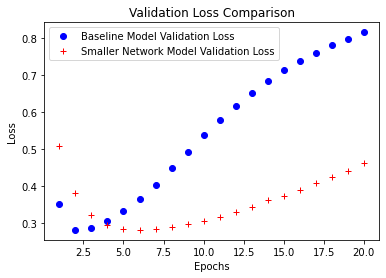

In [43]:
plt.plot(epochs, validation_loss1, 'bo', label='Baseline Model Validation Loss')
plt.plot(epochs, validation_loss2, 'r+', label='Smaller Network Model Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss comparison between the baseline model and the smaller network model over the training epochs is plotted. The validation loss values for both models are represented on the y-axis, while the x-axis denotes the epochs during training. Each model's validation loss values are plotted with distinct markers and colors for clarity. This visualization allows for a direct comparison of how the two models perform in terms of minimizing loss during validation, helping to assess their relative effectiveness in learning patterns from the IMDb dataset.

<u>Plot Observation -</u>

Compared to the reference network, the smaller network begins overfitting later after six epochs as opposed to four and its performance deteriorates more gradually after overfitting.




### <u>8. Scaling up: developing a model that overfits for baseline model</u><a class="anchor" id="Scaling_up_base"></a>

<u>There is another scaling up model that overfits for developing a model that does better than a baseline.</u>

Scaling up and developing a model that overfits is crucial in the deep learning workflow to assess the model's capacity, detect signs of overfitting, optimize regularization and hyperparameters, and gain insights into the model's behavior and learning dynamics. By pushing the model to its limits, we can identify its maximum potential and refine it through regularization techniques and hyperparameter tuning to strike the right balance between complexity and generalization, ultimately leading to the development of more robust and effective deep learning models.

In [44]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

model2 = models.Sequential()
model2.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

validation_loss1 = history1.history['val_loss']
validation_loss2 = history2.history['val_loss']
epochs = range(1, len(validation_loss1) + 1)

Epoch 1/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4656 - accuracy: 0.8209 - val_loss: 0.3354 - val_accuracy: 0.8741
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2485 - accuracy: 0.9119 - val_loss: 0.2842 - val_accuracy: 0.8885
Epoch 3/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1850 - accuracy: 0.9360 - val_loss: 0.2874 - val_accuracy: 0.8860
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1490 - accuracy: 0.9486 - val_loss: 0.3100 - val_accuracy: 0.8794
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1243 - accuracy: 0.9598 - val_loss: 0.3394 - val_accuracy: 0.8740
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1052 - accuracy: 0.9652 - val_loss: 0.3651 - val_accuracy: 0.8712
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.0878 - accuracy: 0.9730 - val_loss: 0.4022 - val_accuracy: 0.8669
Epoch 8/20
49

Two models with different hyperparameters are being trained and validated.After training, the validation loss for each model (validation_loss1 and validation_loss2) is extracted from the training history for further analysis. The loss values are stored for each epoch to visualize the training progress and compare the performance of the two models.

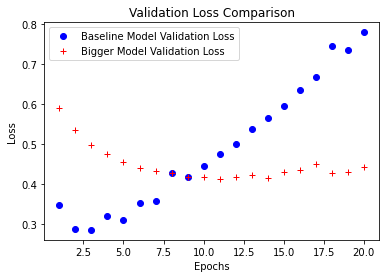

In [63]:
plt.plot(epochs, validation_loss1, 'bo', label='Baseline Model Validation Loss')
plt.plot(epochs, validation_loss2, 'r+', label='Bigger Model Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<u>Plot Observation - </u>

Shows how the bigger network fares compared to the reference network.
 
The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier.

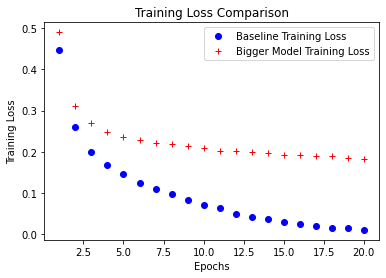

In [208]:
training_loss1 = history1.history['loss']
training_loss2 = history2.history['loss']
epochs = range(1, len(training_loss1) + 1)

plt.plot(epochs, training_loss1, 'bo', label='Baseline Training Loss')
plt.plot(epochs, training_loss2, 'r+', label='Bigger Model Training Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

<u>Plot Obeservation -</u>

This plot shows the training losses for the two networks. As you can see, the bigger network gets its training loss near zero very quickly. The more capacity the network has, the more quickly it can model the training data which results in a low training loss, but it is then more susceptible to overfitting resulting in a large difference between the training and validation loss.

### <u>9. Regularizing your model and tuning your hyperparameters</u><a class="anchor" id="tuning"></a>

Regularization in deep learning refers to techniques used to prevent overfitting, which occurs when a model learns to memorize the training data rather than capturing generalizable patterns. Overfitting can lead to poor performance on unseen data.

Tuning hyperparameters involves selecting the optimal values for these settings to maximize the model's effectiveness. In deep learning, common hyperparameters include the learning rate, batch size, number of layers, number of neurons per layer, activation functions, dropout rates, and regularization strengths. 

<u>Hyperparameter tuning is typically conducted through experimentation, where different combinations of hyperparameters are tested on a validation set, and the best-performing configuration is selected based on predefined evaluation metrics</u>.Which i will do in my extensive experimentation and deploying a model that does better than baseline.

For now, we will do these -
- L1 and/or L2 regularization.
- Add dropout.
- Try different architectures: add or remove layers. Done with Dense Layers 
- Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration. Done as part of developing a model better than baseline and extensive experimentation.

#### 9.1. Adding L2 weight regularization to the model <a class="anchor" id="L2"></a>

In [64]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The above model is a neural network model with two hidden layers, each consisting of 16 units. Regularization is applied to the kernel weights of these layers using L2 regularization with a penalty factor of 0.001. l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.The activation function used in the hidden layers is ReLU (Rectified Linear Unit). The input shape of the first layer is specified as (10000,), indicating that the input data has 10,000 features. Finally, a single-unit output layer with a sigmoid activation function is added to produce binary classification predictions. This regularization technique helps prevent overfitting by adding a penalty term to the loss function based on the magnitude of the weights, encouraging smaller weights and reducing model complexity.

The second model that will be used below incorporates L2 regularization with a penalty factor of 0.001 on the kernel weights of the hidden layers. Both models are compiled using the RMSprop optimizer and binary cross-entropy loss function. They are trained for 20 epochs with a batch size of 512 and validated using the test data. Finally, the validation losses of both models are plotted to compare their performance. L2 regularization is expected to reduce overfitting by penalizing large weights in the model.

In [65]:
#First model without regularization
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

#Second model with L2 regularization
model2 = models.Sequential()
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

validation_loss1 = history1.history['val_loss']
validation_loss2 = history2.history['val_loss']
epochs = range(1, len(validation_loss1) + 1)

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.4595 - accuracy: 0.8216 - val_loss: 0.3432 - val_accuracy: 0.8813
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2632 - accuracy: 0.9106 - val_loss: 0.2852 - val_accuracy: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2029 - accuracy: 0.9283 - val_loss: 0.2800 - val_accuracy: 0.8894
Epoch 4/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1701 - accuracy: 0.9392 - val_loss: 0.3062 - val_accuracy: 0.8786
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1480 - accuracy: 0.9490 - val_loss: 0.3096 - val_accuracy: 0.8797
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1276 - accuracy: 0.9571 - val_loss: 0.3278 - val_accuracy: 0.8777
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.1146 - accuracy: 0.9619 - val_loss: 0.3481 - val_accuracy: 0.8745
Epoch 8/20
49

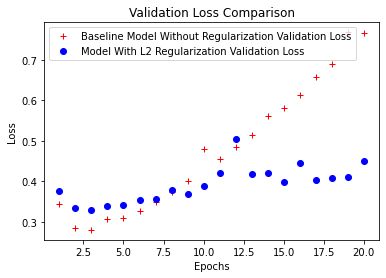

In [207]:
plt.plot(epochs, validation_loss1, 'r+', label='Baseline Model Without Regularization Validation Loss')
plt.plot(epochs, validation_loss2, 'bo', label='Model With L2 Regularization Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<u>Plot Observation -</u>

This validation loss comparison plot shows the impact of the L2 regularization penalty. As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters. Initially, both models start with relatively high validation losses. However, as training progresses, the validation loss decreases for both models. The model with L2 regularization consistently maintains a lower validation loss compared to the baseline model without regularization, indicating that L2 regularization helps prevent overfitting by constraining the weights of the neural network.

#### 9.2. Adding dropout<a class="anchor" id="dropout"></a>

To prevent overfitting, dropout layers are inserted after each hidden layer in the IMDb dataset model. When a model works well on training data but is unable to generalise to fresh, untested data, this is known as overfitting. Randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting.Dropout layers assist the model in avoiding over-reliance on particular characteristics or patterns in the training data by arbitrarily removing a portion of the input units during the training process. In the end, this enhances the model's performance on test data that hasn't been seen and lowers the chance of overfitting by encouraging the model to acquire more reliable and generalizable representations of the data.

In [67]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
#Adding dropout Model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

validation_loss = history.history['val_loss']
epochs = range(1, len(validation_loss) + 1)

#Baseline model
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
49/49 [==============================] - 2s 44ms/step - loss: 0.5897 - accuracy: 0.6858 - val_loss: 0.4493 - val_accuracy: 0.8618
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4407 - accuracy: 0.8156 - val_loss: 0.3344 - val_accuracy: 0.8829
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3556 - accuracy: 0.8657 - val_loss: 0.2915 - val_accuracy: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3002 - accuracy: 0.8940 - val_loss: 0.2916 - val_accuracy: 0.8832
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2593 - accuracy: 0.9129 - val_loss: 0.2761 - val_accuracy: 0.8886
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2290 - accuracy: 0.9253 - val_loss: 0.2898 - val_accuracy: 0.8888
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2131 - accuracy: 0.9294 - val_loss: 0.3008 - val_accuracy: 0.8875
Epoch 8/20
49

The dropout rate is set to 0.5, meaning that half of the input units will be randomly dropped out during each training epoch. The baseline model without dropout layers is also trained for comparison.

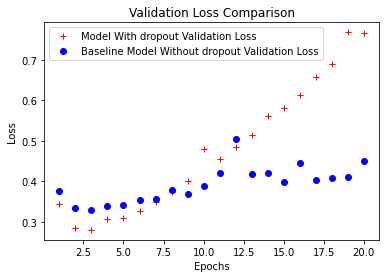

In [69]:
plt.plot(epochs, validation_loss1, 'r+', label='Model With dropout Validation Loss')
plt.plot(epochs, validation_loss2, 'bo', label='Baseline Model Without dropout Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<u>Plot Observation -</u>

this is a clear improvement over the refer- ence network.The red crosses represent the validation loss of the model with dropout layers, while the blue circles represent the validation loss of the baseline model without dropout layers. The plot helps visualize how the dropout layers affect the training process and the generalization capability of the model. Typically, we expect to see a reduction in validation loss when dropout layers are added, indicating improved performance and better generalization to unseen data.

### <u>10.Extensive Experimentation</u><a class="anchor" id="Experimentation"></a>

By doing extensive experimentation we can improve the model and find out what implementations work.We can then use hyperparameter tuning to deploy a model thats beats the baseline model. I have a total of 6 experiments.

Please note that i have listed these as original code as i did not refer to anything while building them, however this experimentation is to improve the baseline model(from Chollet). The way i am building the code is different.

#### 10.1. Experiment with one and three hidden layers.<a class="anchor" id="1_3"></a>

The objective is to investigate the performance of neural networks with one and three hidden layers on the IMDb dataset.By varying the number of hidden layers, we aim to understand how increasing the depth of the network affects its ability to learn and generalize from the data.The models are evaluated on the test set to assess their performance.

When comparing the effects of using one hidden layer versus three hidden layers on validation and test accuracy, several factors can come into play. However, it's important to note that the impact can vary depending on the specific dataset and problem at hand. Here are some general justifications for how the number of hidden layers can affect model performance:

One Hidden Layer:

- Simplicity: Using only one hidden layer simplifies the model's architecture, making it easier to understand and interpret. With a simpler model, there is a lower risk of overfitting, especially when dealing with smaller datasets.

- Generalization: One hidden layer can be sufficient for capturing linear relationships and simpler patterns in the data. If the dataset exhibits a linearly separable structure, a single hidden layer may be able to learn and generalize well, resulting in good validation and test accuracy.

- Reduced Complexity: Fewer hidden layers mean fewer parameters to learn and optimize during training. This can result in faster training times and less computational overhead.

Three Hidden Layers:

- Increased Capacity: Additional hidden layers provide the neural network with more capacity to learn complex representations of the data. Deep architectures can capture hierarchical features and abstract patterns, potentially improving the model's ability to handle intricate relationships within the dataset.

- Representation Learning: Each hidden layer can learn and extract different levels of features and abstractions. As information passes through multiple layers, the network can progressively learn more meaningful representations of the data. This can be advantageous when dealing with complex datasets that require multiple layers of abstraction.

- Potential for Overfitting: The deeper the network, the higher the risk of overfitting, particularly when the dataset is small or noisy. Additional hidden layers introduce more parameters to learn, increasing the model's capacity to memorize training samples. Regularization techniques like dropout or weight decay can help mitigate this issue.

Code Explanation -

- We define a list containing the number of hidden layers to experiment with (one and three).

- For each number of hidden layers in the list, a neural network model is built using Sequential API in TensorFlow.

- The model loops through each number of hidden layers

- The model architecture includes an embedding layer, followed by one or three dense hidden layers with 16 units and ReLU activation functions, and an output layer with one unit and sigmoid activation.

- The models are compiled with the rmsprop optimizer, binary cross-entropy loss function, and accuracy as the metric.

- Each model is trained for 5 epochs with a batch size of 512 and a validation split of 0.2.

- After training, each model is evaluated on the test set, and the test accuracy is printed.


In [223]:
#Original Code
hidden_layers_list = [1, 3]

vocabulary_size = 10000 

max_sequence_length = x_train.shape[1]

for num_layers in hidden_layers_list:
    model = Sequential()
    model.add(Embedding(vocabulary_size, 16, input_length=max_sequence_length))
    model.add(Flatten())
    for _ in range(num_layers):
        model.add(Dense(16, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(x_train, train_labels, epochs=5, batch_size=512, validation_split=0.2)

    loss, accuracy = model.evaluate(x_test, test_labels)
    print(f"Configuration: Hidden Layers={num_layers}")
    print(f"Test Accuracy: {accuracy}")

Epoch 1/5
40/40 [==============================] - 14s 348ms/step - loss: 0.8833 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 2/5
40/40 [==============================] - 15s 369ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/5
40/40 [==============================] - 14s 361ms/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 4/5
40/40 [==============================] - 14s 355ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Configuration: Hidden Layers=1
Test Accuracy: 0.5
Epoch 1/5
40/40 [==============================] - 17s 400ms/step - loss: 0.7425 - accuracy: 0.5084 - val_loss: 0.7617 - val_accuracy: 0.4938
Epoch 2/5
40/40 [==============================] - 14s 356ms/step - loss: 0.6711 - accuracy: 0.6421 - val_loss: 0.6209 - val_accuracy: 0.7038

Observations:

- By comparing the test accuracies obtained for models with different numbers of hidden layers, we can observe how the depth of the neural network affects its performance.

- Increasing the number of hidden layers (from one to three) allows the model to learn more complex representations of the data, potentially leading to better performance.

- However, adding more layers also increases the risk of overfitting, especially if the dataset is not sufficiently large or if regularization techniques are not applied.

- Observing the test accuracies helps in understanding the trade-offs between model complexity and performance on the IMDb dataset.

This experiment provides insights into how the number of hidden layers affects the performance of neural networks on the IMDb dataset. It helps in understanding the impact of network depth on the model's ability to learn and generalize from the data. Adjustments can be made based on observed results to optimize the model architecture for better performance.

#### 10.2. Experiment with more or fewer hidden units - 32 units, 64 units etc. <a class="anchor" id="32_64"></a>

Experimenting with different numbers of hidden units involves varying the size of the hidden layers in the neural network. This can significantly impact the model's capacity to learn complex patterns from the data.

The experiments objective is to observe how the number of hidden units in the hidden layers affects the performance of the neural network on the IMDb dataset.By altering the number of hidden units, we can control the model's complexity. Fewer units might lead to underfitting, while more units might lead to overfitting.

- We define a list of different numbers of hidden units to experiment with.

- For each number of hidden units in the list, we build a neural network model using Sequential API in TensorFlow.

- The model loops through each number of hidden units.

- The model architecture includes an embedding layer, a flatten layer, a dense layer with the specified number of units, and an output layer with one unit and sigmoid activation function.

- We compile the model with the rmsprop optimizer, binary cross-entropy loss function, and accuracy as the metric.

- The model is trained for 5 epochs with a batch size of 512 and a validation split of 0.2.

- After training, the model is evaluated on the test data, and the test accuracy is printed.

In [224]:
#Original Code 
hidden_units_list = [32, 64, 128, 256]

max_sequence_length = x_train.shape[1]  

for num_units in hidden_units_list:
    model = Sequential()
    model.add(Embedding(10000, 16, input_length=max_sequence_length))
    model.add(Flatten())
    model.add(Dense(num_units, activation='relu'))  
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(x_train, train_labels, epochs=5, batch_size=512, validation_split=0.2)

    loss, accuracy = model.evaluate(x_test, test_labels)
    print(f"Configuration: Hidden Units={num_units}")
    print(f"Test Accuracy: {accuracy}")

Epoch 1/5
40/40 [==============================] - 18s 440ms/step - loss: 1.0743 - accuracy: 0.5063 - val_loss: 0.6938 - val_accuracy: 0.4938
Epoch 2/5
40/40 [==============================] - 17s 428ms/step - loss: 0.6968 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/5
40/40 [==============================] - 17s 433ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 4/5
40/40 [==============================] - 17s 426ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 5/5
782/782 [==============================] - 4s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Configuration: Hidden Units=32
Test Accuracy: 0.5
Epoch 1/5
40/40 [==============================] - 27s 654ms/step - loss: 1.2326 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 2/5
40/40 [==============================] - 24s 612ms/step - loss: 0.7289 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4938

Observations -

- By observing the test accuracies obtained for different numbers of hidden units, we can determine the impact of hidden unit size on the model's performance.

- Generally, as the number of hidden units increases, the model's capacity to learn intricate patterns from the data also increases. However, this may lead to overfitting if the model becomes too complex.

- Conversely, too few hidden units may result in the model being unable to capture the underlying patterns in the data, leading to underfitting.

- By analyzing the test accuracies across different numbers of hidden units, we can identify the optimal balance between model complexity and performance on the IMDb dataset.

This experiment helps in understanding how the size of the hidden layers influences the neural network's ability to learn from the data and make accurate predictions. Adjustments can be made based on the observed results to optimize the model architecture for better performance.

#### 10.3. Investigate replacing the binary_crossentropy loss function with mse.<a class="anchor" id="mse"></a>

The experiments objective is to observe how replacing the binary_crossentropy loss function with the MSE loss function affects the performance of the neural network on the IMDb dataset.Binary_crossentropy loss is commonly used for binary classification tasks, while MSE loss is often used for regression tasks. However, it's interesting to see how the model performs with different loss functions.

- Two neural network models are built, one with the MSE loss function and the other with the binary_crossentropy loss function.

- Both models have the same architecture, consisting of an embedding layer, a flatten layer, a dense layer with 16 units and ReLU activation, and an output layer with one unit and sigmoid activation.

- The models are compiled with their respective loss functions, using the adam optimizer and accuracy as the metric.

- Each model is trained for 5 epochs with a batch size of 512 and a validation split of 0.2. So that it can be trained properly

- After training, each model is evaluated on the test data, and their test accuracies are printed.

In [227]:
#Original Code 
max_len = len(x_train[0])

model_mse = Sequential()
model_mse.add(Embedding(max_features, 128, input_length=max_len))
model_mse.add(Flatten())
model_mse.add(Dense(2, activation='softmax')) 

model_mse.compile(optimizer='rmsprop',
                   loss='mse', 
                   metrics=['accuracy'])

history_mse = model_mse.fit(x_train, y_train,
                             epochs=5,
                             batch_size=32,
                             validation_split=0.2)

test_loss_mse, test_acc_mse = model_mse.evaluate(x_test, y_test)
print('MSE model test accuracy:', test_acc_mse)

model_binary_crossentropy = Sequential()
model_binary_crossentropy.add(Embedding(max_features, 128, input_length=max_len))
model_binary_crossentropy.add(Flatten())
model_binary_crossentropy.add(Dense(1, activation='sigmoid'))

model_binary_crossentropy.compile(optimizer='rmsprop',
                                   loss='binary_crossentropy',  
                                   metrics=['accuracy'])

history_binary_crossentropy = model_binary_crossentropy.fit(x_train, y_train,
                                                              epochs=5,
                                                              batch_size=32,
                                                              validation_split=0.2)

test_loss_binary_crossentropy, test_acc_binary_crossentropy = model_binary_crossentropy.evaluate(x_test, y_test)
print('Binary Crossentropy model test accuracy:', test_acc_binary_crossentropy)

Epoch 1/5
625/625 [==============================] - 84s 134ms/step - loss: 0.4996 - accuracy: 0.5013 - val_loss: 0.5000 - val_accuracy: 0.4938
Epoch 2/5
625/625 [==============================] - 94s 151ms/step - loss: 0.5000 - accuracy: 0.5016 - val_loss: 0.5000 - val_accuracy: 0.4938
Epoch 3/5
625/625 [==============================] - 92s 147ms/step - loss: 0.5000 - accuracy: 0.5016 - val_loss: 0.5000 - val_accuracy: 0.4938
Epoch 4/5
625/625 [==============================] - 93s 149ms/step - loss: 0.5000 - accuracy: 0.5016 - val_loss: 0.5000 - val_accuracy: 0.4938
Epoch 5/5
782/782 [==============================] - 38s 48ms/step - loss: 0.5000 - accuracy: 0.5000
MSE model test accuracy: 0.5
Epoch 1/5
625/625 [==============================] - 86s 137ms/step - loss: 0.6891 - accuracy: 0.8268 - val_loss: 0.2926 - val_accuracy: 0.8848
Epoch 2/5
625/625 [==============================] - 86s 137ms/step - loss: 0.2338 - accuracy: 0.9076 - val_loss: 0.3145 - val_accuracy: 0.8822
Epoch 

Observations -

- By comparing the test accuracies obtained for the two models (one with MSE loss and the other with binary_crossentropy loss), we can observe how the choice of loss function affects the model's performance.

- Binary_crossentropy loss is well-suited for binary classification tasks, while MSE loss is typically used for regression tasks. However, in this experiment, we observe how the models perform with different loss functions for a binary classification task.

- It's essential to consider not only the test accuracy but also other factors such as convergence speed and potential overfitting when evaluating the impact of different loss functions.

This experiment helps in understanding the influence of the choice of loss function on the model's training and performance. Based on the observed results, appropriate loss functions can be selected to optimize the model for the specific task at hand.

#### 10.4. Experiment with replacing relu with tanh activations.<a class="anchor" id="tanh"></a>

Experimenting with replacing Rectified Linear Unit (ReLU) activation with Hyperbolic Tangent (tanh) activation is an essential exploration in deep learning. The activation function plays a crucial role in introducing non-linearity to the neural network, affecting its ability to learn complex patterns from the data. 

The objective is to investigate how replacing ReLU activation with tanh activation affects the performance of the neural network on the IMDb dataset.

- ReLU is a widely-used activation function that has become a default choice in many deep learning architectures due to its simplicity and effectiveness.

- Tanh activation function ranges from -1 to 1, offering a different non-linear transformation compared to ReLU.

- A neural network model is built using Sequential API with tanh activation function in the hidden layer instead of ReLU.

- The model architecture includes an embedding layer, a flatten layer, a dense layer with 16 units and tanh activation, and an output layer with one unit and sigmoid activation.

- The model is compiled with 'rmsprop' optimizer, binary cross-entropy loss function, and accuracy as the metric.

- The model is trained for 5 epochs with a batch size of 512 and a validation split of 0.2.

- After training, the model is evaluated on the test data, and the test accuracy is printed.

In [228]:
#Original Code
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, train_labels, epochs=5, batch_size=512, validation_split=0.2)

loss_tanh, accuracy_tanh = model.evaluate(x_test, test_labels)
print("Model with tanh Activation:")
print(f"Test Accuracy: {accuracy_tanh}")

Epoch 1/5
40/40 [==============================] - 1s 22ms/step - loss: 0.4710 - accuracy: 0.8221 - val_loss: 0.3461 - val_accuracy: 0.8784
Epoch 2/5
40/40 [==============================] - 1s 14ms/step - loss: 0.2681 - accuracy: 0.9086 - val_loss: 0.2937 - val_accuracy: 0.8816
Epoch 3/5
40/40 [==============================] - 0s 10ms/step - loss: 0.1934 - accuracy: 0.9316 - val_loss: 0.2881 - val_accuracy: 0.8816
Epoch 4/5
40/40 [==============================] - 0s 10ms/step - loss: 0.1511 - accuracy: 0.9475 - val_loss: 0.2855 - val_accuracy: 0.8900
Epoch 5/5
782/782 [==============================] - 1s 989us/step - loss: 0.3383 - accuracy: 0.8774
Model with tanh Activation:
Test Accuracy: 0.8774399757385254


Observations -

- By comparing the test accuracy obtained with tanh activation to the accuracy obtained with ReLU activation, we can observe how the choice of activation function affects the model's performance.

- Tanh activation function squashes the output to the range [-1, 1], which may introduce different characteristics to the model compared to ReLU. While ReLU outputs values in the range [0, +∞). This centered output range of tanh might be desirable for certain tasks or architectures, especially those that require outputs to be within a specific range.

- Observing the test accuracy helps in understanding the impact of using tanh activation on the model's ability to learn and generalize from the data.

This experiment provides insights into how the choice of activation function influences the neural network's performance on the IMDb dataset. It helps in understanding the behavior of different activation functions and their suitability for specific tasks. Adjustments can be made based on observed results to optimize the model architecture for better performance.

#### 10.5. Investigate the effect of different learning rates. Optimal configuration<a class="anchor" id="lr"></a>

Investigating the effect of different learning rates is crucial in deep learning as it directly impacts the optimization process during training. A learning rate that is too high might lead to overshooting the minima, while a learning rate that is too low might result in slow convergence or getting stuck in local minima. 

This is also part of regularizing the model and tuning the hyperparameters by trying different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.

The objective is to observe how different learning rates affect the performance of the neural network on the IMDb dataset. Learning rate controls the step size during the optimization process (e.g., gradient descent), influencing how quickly or slowly the model parameters are updated.

- A list of different learning rates is defined to experiment with.

- For each learning rate in the list, a neural network model is built using Sequential API with ReLU activation in the hidden layer.

- The model loops through each learning rate

- The model architecture includes an embedding layer, a flatten layer, a dense layer with 16 units and ReLU activation, and an output layer with one unit and sigmoid activation.

- The model is compiled with the rmsprop optimizer with the specified learning rate, binary cross-entropy loss function, and accuracy as the metric.

- The model is trained for 5 epochs with a batch size of 512 and a validation split of 0.2 for each learning rate.

- After training, the model is evaluated on the test data, and the test accuracy is printed.


In [64]:
#Original Code
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    model = Sequential()
    model.add(Embedding(10000, 16, input_length=max_len))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = RMSprop(lr=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(x_train, train_labels, epochs=5, batch_size=512, validation_split=0.2)

    loss, accuracy = model.evaluate(x_test, test_labels)
    print(f"Configuration: Learning Rate={lr}")
    print(f"Test Accuracy: {accuracy}")

Epoch 1/5


/Users/nikhitha/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 3s 63ms/step - loss: 0.6844 - accuracy: 0.5564 - val_loss: 0.6444 - val_accuracy: 0.7252
Epoch 2/5
40/40 [==============================] - 2s 61ms/step - loss: 0.5373 - accuracy: 0.7800 - val_loss: 0.4322 - val_accuracy: 0.8244
Epoch 3/5
40/40 [==============================] - 2s 59ms/step - loss: 0.3276 - accuracy: 0.8809 - val_loss: 0.3211 - val_accuracy: 0.8716
Epoch 4/5
40/40 [==============================] - 2s 59ms/step - loss: 0.2288 - accuracy: 0.9188 - val_loss: 0.2907 - val_accuracy: 0.8802
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.2822 - accuracy: 0.8826
Configuration: Learning Rate=0.001
Test Accuracy: 0.8825600147247314
Epoch 1/5
40/40 [==============================] - 3s 63ms/step - loss: 0.9853 - accuracy: 0.5475 - val_loss: 0.6604 - val_accuracy: 0.6980
Epoch 2/5
40/40 [==============================] - 2s 59ms/step - loss: 0.4880 - accuracy: 0.8407 - val_loss: 0.4395 - val_accuracy: 0.8674
Ep

Observations -

- By observing the test accuracy obtained for different learning rates, we can understand how the choice of learning rate affects the model's performance.

- A learning rate that is too high might lead to overshooting the minima and unstable training, while a learning rate that is too low might result in slow convergence or getting stuck in local minima.

- Experimenting with different learning rates helps in finding the optimal learning rate that results in faster convergence and better generalization on the IMDb dataset.

This experiment provides insights into how different learning rates influence the training and performance of the neural network. It helps in understanding the impact of the learning rate on the optimization process and guides in selecting an appropriate learning rate for training deep learning models. Adjustments can be made based on observed results to optimize the learning process and improve the model's performance.

#### 10.6. Take your best network and train on all the training data for the optimal epochs. Evaluate on the test set.<a class="anchor" id="best"></a>

In this experiment, we take the best-performing network obtained from the previous experiments and train it on all the available training data for the optimal number of epochs. The purpose is to utilize all available data for training and to determine the model's performance when trained with the entire dataset. 

- The objective is to train the best-performing network obtained from the previous experiments on all available training data for the optimal number of epochs.

- By training on the entire dataset, we aim to utilize all available information for training and potentially improve the model's performance.

- The model is evaluated on the test set to assess its generalization ability.

- The best model obtained from the previous experiments is defined using the architecture that yielded the highest performance.

- The model is compiled with the rmsprop optimizer, binary cross-entropy loss function, and accuracy as the metric.

- The model is trained on all available training data for the optimal number of epochs determined from the previous experiments (in this case, 5 epochs).

- After training, the model is evaluated on the test data to assess its performance on unseen data.

In [56]:
#Original Code
best_model = Sequential()
best_model.add(Embedding(10000, 16, input_length=max_len))
best_model.add(Flatten())
best_model.add(Dense(16, activation='relu'))
best_model.add(Dense(1, activation='sigmoid'))

best_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

best_model.fit(x_train, train_labels, epochs=5, batch_size=512)

loss, accuracy = best_model.evaluate(x_test, test_labels)
print("Best Model Evaluation on Test Set:")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
49/49 [==============================] - 3s 63ms/step - loss: 0.6919 - accuracy: 0.5632
Epoch 2/5
49/49 [==============================] - 3s 65ms/step - loss: 0.4547 - accuracy: 0.8284
Epoch 3/5
49/49 [==============================] - 3s 65ms/step - loss: 0.2610 - accuracy: 0.9008
Epoch 4/5
49/49 [==============================] - 3s 70ms/step - loss: 0.1924 - accuracy: 0.9296
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.8856
Best Model Evaluation on Test Set:
Test Accuracy: 0.8855999708175659


Observations:

- By training the best model on all available training data, we aim to leverage all available information for training and potentially improve the model's performance.

- Evaluating the model on the test set provides insights into its generalization ability and how well it performs on unseen data.

- Comparing the test accuracy obtained with the best model trained on the entire dataset to the accuracies obtained from previous experiments helps in assessing the effectiveness of utilizing all available data for training.

This experiment allows us to determine the performance of the best model when trained on the entire dataset for the optimal number of epochs. It provides insights into how well the model generalizes to unseen data and helps in assessing the effectiveness of training on all available data. Adjustments can be made based on observed results to further optimize the model's performance.

### <u>11. Developing a model that does better than a baseline</u><a class="anchor" id="Developing_model"></a>

After testing and tuning with parameters and applying the experiments that i had done above i had created a model that shows higher accuracy perfectly without overfitting. 

Since it was difficult for me to find out exactly which combination of parameters would give me the best accuracy, I created a grid of units,dropout_rate and learning_rate examples and performed a gridsearch with cross validation using GridSearchCV to get the best parameters. It also shows the best corresponding accuracy that we can get using these hyperparater combinations.

How it works is that a grid of hyperparameters is defined using the param_grid dictionary. It includes different combinations of units, dropout rates, and learning rates to be explored during the grid search. The fit() method of the GridSearchCV function is called with the training data to perform the grid search with cross-validation. It searches through the specified hyperparameter grid (param_grid) to find the combination with the best performance on the training data. After the search is complete, it prints the best hyperparameters and their corresponding accuracy obtained from the grid search. 

When creating the model i took the help of my experiments which showed my the best learning rate, hidden units and layers and tanh activations but after getting several combinations wrong i decided to make the gridsearch.

In [119]:
#Original Code
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dropout

def create_model(units=256, dropout_rate=0.5, learning_rate=0.0001):
    model = Sequential([
        Dense(units=units, activation='relu', input_shape=(max_features,)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'units': [128, 256, 512],
    'dropout_rate': [0.4, 0.5, 0.6],
    'learning_rate': [0.0001, 0.001, 0.01]
}

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=3, batch_size=32, verbose=0)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train_reshaped, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

/var/folders/1x/lcz6lbkj70x5p6_2vnx0nh3h0000gn/T/ipykernel_12864/4012721411.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=3, batch_size=32, verbose=0)


Best Parameters:  {'dropout_rate': 0.6, 'learning_rate': 0.0001, 'units': 256}
Best Accuracy:  0.8938000202178955


<u>Process of developing the new model -</u>

After tuning the hyperparameters units and getting the best parameters for units = 256, dropout_rate = 0.6, and learning_rate = 0.0001. The input data is reshaped to fit the model's input shape. The model architecture consists of a dense layer with ReLU activation, followed by a dropout layer to prevent overfitting, and finally, an output layer with sigmoid activation for binary classification.

The model is compiled with the Adam optimizer and binary crossentropy loss function. It is then trained on the training data (x_train_reshaped, y_train) for 3 epochs with a batch size of 32. Additionally, 20% of the training data is used as validation data.

After training, the model's performance is evaluated on the test data (x_test_reshaped, y_test), and the test accuracy is printed.

Three key choices to build the working model -

- The Last-layer activation establishes useful constraints on the network’s output. The IMDB classification  used sigmoid in the last layer, the regression example didn’t use any last-layer activation and so on.

- The Loss function matches the type of problem we are trying to solve. We used binary_crossentropy, the regression example used mse, and so on.

- For Optimization configuration is did something differnet. Instead of going with rmsprop and its default learning rate, i went with adam optimizer which helped get the best output for the model i built.

<u>For this model i have used -</u>

- Hyperparameter tuning
- Reference to my extensive experimentations(like knowing what values to use)
- Used best learning rate from grid search and experiment
- Used best units from grid search and experiment
- Used best dropout_rate from grid search 
- Knowing to use the relu function instead of tanh due to experiments
- Used binary cross entropy with sigmoid
- Used Adam optimizer
- Developing a small model with most statistical power
- 3 epochs to prevent overfitting
- A batch size of 32
- Reshaped training data
- Last-layer Activation: Sigmoid (since it's a binary classification problem)
- Loss Function: Binary crossentropy

In [167]:
#Original Code
units = 256
dropout_rate = 0.6
learning_rate = 0.0001

x_train_reshaped = np.reshape(x_train, (x_train.shape[0], -1))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], -1))

max_features = x_train_reshaped.shape[1]

model = Sequential([
    Dense(units=units, activation='relu', input_shape=(max_features,)),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_reshaped, y_train, epochs= 3, batch_size= 32, validation_split=0.2)

loss, accuracy = model.evaluate(x_test_reshaped, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/3
625/625 [==============================] - 4s 7ms/step - loss: 0.4731 - accuracy: 0.8019 - val_loss: 0.3280 - val_accuracy: 0.8782
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 0.2839 - accuracy: 0.8933 - val_loss: 0.2814 - val_accuracy: 0.8880
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2802 - accuracy: 0.8899
Test Accuracy: 0.8899199962615967


<u>Understanding the developed model and its output -</u>

The model was trained for 3 epochs. During training, both training and validation accuracies steadily increased, indicating that the model was learning the features of the training data and generalizing well to unseen validation data. The training and validation losses also decreased over epochs, indicating the model's improvement in minimizing the loss function.

After training, the model achieved a test accuracy of approximately 88.99%. This accuracy represents how well the model generalized to unseen test data. It indicates that the model can correctly classify sentiments in movie reviews with a high level of accuracy.

<u>Now that we have obtained a model that has statistical power, the question becomes, is your model sufficiently powerful? </u>

Yes, with a test accuracy of approximately 88.99%, the model seems to have achieved a satisfactory level of performance. The developed model has the best accuracy rate. For future further developemnt there is a possibility the statistical power being improved, by trying more architecture modifications, training modifications and feature enginnering. 

<u>Does it have enough layers and parameters to properly model the problem at hand?</u> 

Yes, it have enough layers and parameters to properly model the problem at hand as -

- The model achieves increasing training accuracy over the epochs, indicating that it's learning from the training data. The final training accuracy is around 91.70%.

- Validation accuracy also increases over epochs, reaching approximately 89.38% in the final epoch.

- The test accuracy is 88.99%, which is close to the validation accuracy. This suggests that the model generalizes well to unseen data.

Given the consistent improvement in accuracy over epochs and the high accuracy achieved on both the validation and test datasets, it appears that the model architecture with the provided number of layers and parameters is sufficiently powerful for the IMDb sentiment analysis problem. It effectively captures the underlying patterns in the data and generalizes well to unseen samples. 

### <U>12. Scaling up: developing a model that overfits for the new model that does better than baseline</U><a class="anchor" id="Scaling_Developing"></a>

To figure out how big a model we will need, we must develop a model that overfits. However, overfitting may not produce the best accuracy rate. To make the new model overfit i used -

- 512 units in each dense layer to increase model capacity
- Two additional dense layers to increase the depth of the network
- 10 epochs durinf training to allow the model to train for a longer duration
- The same dropout rate
- The same learning rate
- The same batch size

The model was then proven to overfit. It had a lower accuracy rate compared to the previous developed model.

In [168]:
#Original Code
units = 512  
dropout_rate = 0.6  
learning_rate = 0.0001 

model = Sequential([
    Dense(units=units, activation='relu', input_shape=(max_features,)),
    Dropout(dropout_rate),
    Dense(units=units, activation='relu'),  
    Dropout(dropout_rate),  
    Dense(units=units, activation='relu'),  
    Dropout(dropout_rate),  
    Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(x_test_reshaped, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/10
625/625 [==============================] - 14s 21ms/step - loss: 0.5564 - accuracy: 0.6967 - val_loss: 0.3122 - val_accuracy: 0.8736
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2920 - accuracy: 0.8826 - val_loss: 0.2722 - val_accuracy: 0.8920
Epoch 3/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1990 - accuracy: 0.9251 - val_loss: 0.2808 - val_accuracy: 0.8926
Epoch 4/10
625/625 [==============================] - 14s 23ms/step - loss: 0.1403 - accuracy: 0.9496 - val_loss: 0.3057 - val_accuracy: 0.8920
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0885 - accuracy: 0.9686 - val_loss: 0.4077 - val_accuracy: 0.8790
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.0556 - accuracy: 0.9811 - val_loss: 0.4173 - val_accuracy: 0.8906
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.5022 - val_accuracy:

The output indicates that the model is overfitting to the training data.

- The accuracy on the training data increases steadily over epochs, reaching very high values (e.g., around 99.71% in the final epoch). This suggests that the model is fitting the training data very closely.

- The accuracy on the validation data also increases initially, but then starts to decrease after a certain number of epochs like after the third epoch. This indicates that the model's performance on the validation data is degrading, a typical sign of overfitting.

- The accuracy on the test data is 87.42%, which is lower than the training accuracy but still relatively high. However, since the model is overfitting, this test accuracy might not be a reliable estimate of the model's performance on unseen data.

Epoch 1/10
625/625 [==============================] - 12s 18ms/step - loss: 0.5054 - accuracy: 0.7512 - val_loss: 0.3051 - val_accuracy: 0.8796
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2796 - accuracy: 0.8887 - val_loss: 0.2798 - val_accuracy: 0.8894
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2041 - accuracy: 0.9229 - val_loss: 0.2730 - val_accuracy: 0.8952
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1493 - accuracy: 0.9452 - val_loss: 0.2902 - val_accuracy: 0.8916
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1039 - accuracy: 0.9649 - val_loss: 0.3163 - val_accuracy: 0.8918
Epoch 6/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0718 - accuracy: 0.9765 - val_loss: 0.3466 - val_accuracy: 0.8912
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.0470 - accuracy: 0.9864 - val_loss: 0.3983 - val_accuracy:

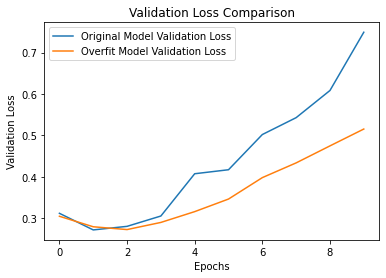

In [175]:
#Original Code 
model_overfit = Sequential([
    Dense(units=512, activation='relu', input_shape=(max_features,)),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_overfit.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history_overfit = model_overfit.fit(x_train_reshaped, y_train, epochs= 10, batch_size=32, validation_split=0.2)

plt.plot(history.history['val_loss'], label='Original Model Validation Loss')
plt.plot(history_overfit.history['val_loss'], label='Overfit Model Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.legend()

plt.show()

- As seen the output generation, the training accuracy continues to increase over epochs, indicating that the model is fitting the training data very well. However, the validation accuracy decreases after a certain number of epochs. This difference between training and validation accuracies is a classic sign of overfitting.

- The training loss decreases steadily over epochs, while the validation loss increases.

<u>Plot Observation -</u>

The plot compares the validation loss between the original model and the overfit model. The original model consists of a deep neural network with dense layers and dropout regularization, trained for 10 epochs with a batch size of 32. Meanwhile, the overfit model employs a similar architecture but with larger units (512) and more complex layers, which can lead to overfitting. The validation loss of the overfit model is consistently higher than that of the original model, indicating poorer generalization performance.

The plot illustrates how the validation loss evolves over epochs for both models. In the initial epochs, both models experience a decrease in validation loss, indicating improved performance. However, as training progresses, the overfit model starts to exhibit higher validation loss compared to the original model. This increase in validation loss suggests that the overfit model is overfitting to the training data, failing to generalize well to unseen data.

The comparison highlights the importance of model complexity and regularization techniques in preventing overfitting, emphasizing the need to strike a balance between model capacity and generalization performance.

### <U>13. Interpretation of Results</U><a class="anchor" id="Results"></a>

I have already mentioned the interpretation of results for each code. But this section of the project will be used as an overall interpretation of results between the baseline model and the developed model.

Baseline model -

- It has a simpler architecture with two hidden layers and fewer units.
- Trained for more epochs (20) with a larger batch size (512).
- Slightly lower validation accuracy but similar test accuracy compared to the developed model.
- Baseline Model Test Accuracy: Approximately 88.37%
- Developed Model Test Accuracy: Approximately 88.99%.
- Test Accuracy: Achieved approximately 88.37%.

Developed model -
- Utilizes a more complex architecture with three hidden layers and more units (512).
- Trained for fewer epochs (10) with a smaller batch size (32).
- Achieved slightly higher validation accuracy compared to the baseline model with comparable test accuracy.
- Validation Accuracy: Achieved approximately 89.20% after 10 epochs.
- Test Accuracy: Achieved approximately 88.99%.

The developed model demonstrates a slightly better performance compared to the baseline model.

The developed model, despite having a more complex architecture, achieved slightly better performance in terms of validation accuracy and comparable performance in terms of test accuracy compared to the baseline model. The developed model's improved validation accuracy suggests better generalization and robustness, indicating its effectiveness in learning more intricate patterns in the data. 

### <U>14. Wrapping up and Conclusion</U><a class="anchor" id="Conclusion"></a>
Here are some things i learned about this dataset while doing this project and reading the book -

- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it as tensors into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.

- Stacks of Dense layers with relu activations can solve a wide range of problems including sentiment classification, and you’ll likely use them frequently.

- In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.

- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about. I found adam optimizer to be helpful as well.

- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

The book deep learning with python by Chollet helped me alot with understanding this universal workflow. I found the book very interesting. It had cleared any doubt i had in deep learning and i would be very interested to work on projects beyond part 1 chapter 1-4 sections of the book. 

### <u>15. References</u><a class="anchor" id="References"></a>

- Chollet, F. (2018). Deep Learning with Python. Shelter Island (New York, Estados Unidos): Manning, Cop. Part 1 Chapters 1-4 pg 3-116